### LTFS Data Science FinHack 2
LTFS receives a lot of requests for its various finance offerings that include housing loan, two-wheeler loan, real estate financing and micro loans. The number of applications received is something that varies a lot with season. Going through these applications is a manual process and is tedious. Accurately forecasting the number of cases received can help with resource and manpower management resulting into quick response on applications and more efficient processing.

### Problem Statement:
You have been appointed with the task of forecasting daily cases for next 3 months for 2 different business segments aggregated at the country level keeping in consideration the following major Indian festivals (inclusive but not exhaustive list): Diwali, Dussehra, Ganesh Chaturthi, Navratri, Holi etc.(You are free to use any publicly available open source external datasets). Some other examples could be:

Weather Macroeconomic variables Note that the external dataset must belong to a reliable source.

Data Dictionary The train data has been provided in the following way:

For business segment 1, historical data has been made available at branch ID level For business segment 2, historical data has been made available at State level.
Train File Variable Definition application_date Date of application segment Business Segment (1/2) branch_id Anonymised id for branch at which application was received state State in which application was received (Karnataka, MP etc.) zone Zone of state in which application was received (Central, East etc.) case_count (Target) Number of cases/applications received

Test File Forecasting needs to be done at country level for the dates provided in test set for each segment.

Variable Definition id Unique id for each sample in test set application_date Date of application segment Business Segment (1/2)

Evaluation
Evaluation Metric The evaluation metric for scoring the forecasts is *MAPE (Mean Absolute Percentage Error) M with the formula:

Where At is the actual value and Ft is the forecast value.

The Final score is calculated using MAPE for both the segments using the formula:

## Approach For Segement 1

### Checking Stationarity for Segment 1 : 
A time series is said to be stationary if its statistical properties such as mean, variance remain constant over time.As most time series models work on the assumption that the time series are stationary, it is important to validate that hypothesis.The Dickey Fuller Test is a statistical test for testing stationarity. The Null-hypothesis for the test is that the time series is not stationary. So if the test statistic is less than the critical value, we reject the null hypothesis and say that the series is stationary.

#### It is observed from adfuller test segment1 is stationary.


### Data Pre-Processing / Feature Engineering for segment 1: 

To Decide the number of previous time steps to take i.e lags, ACF and PACF plots are used. 

#### It is observed from PACF graph correlation is near to zero at lag 8, therefore 8 timesteps considered. 

Covariance : Positive and negative, Depends on scale of the variables. Hard to interpret small or large.

Correlations: Standardized version of covariance, Positive and negative do not depend on scale of the variables. Always between 1 and -1.

ACF: The ACF plot is used to determine number of lags or timesteps

PACF: The correlation between 2 variables controlling for the values of another set of variables.

Example : If we consider 3 consecutive values of a time series having some autocorrelation with each other.

Correlation between current and lag 2 is autocorrelation.

The same calculation for controlling for lag 1 is Partial Autocorrelation. 

The ACF plot will show autocorrelation decaying towards 0.

PACF plot will cut off quickly towards 0.

### Final Model segment 1:
LSTM: These are good at processing sequential data with long short term memory and uses a gating mechanism.

Models which i have tried are :LSTM, GRU,CNN-LSTM,BiDirectional LSTM,Conv1D models.

#### Final Model : Out of all the above models Bi Directional LSTM has given the better score.



## Approach For Segement 2

#### Checking Stationarity for Segment 2 : 
A time series is said to be stationary if its statistical properties such as mean, variance remain constant over time.As most time series models work on the assumption that the time series are stationary, it is important to validate that hypothesis.The Dickey Fuller Test is a statistical test for testing stationarity. The Null-hypothesis for the test is that the time series is not stationary. So if the test statistic is less than the critical value, we reject the null hypothesis and say that the series is stationary.

#### It is observed from adfuller test segment1 is stationary.


#### Data Pre-Processing / Feature Engineering for segment 2: 

To Decide the number of previous time steps to take i.e lags, ACF and PACF plots are used. 

#### It is observed from PACF graph correlation is near to zero at lag 7, therefore 7 timesteps considered. 

Covariance : Positive and negative, Depends on scale of the variables. Hard to interpret small or large.

Correlations: Standardized version of covariance, Positive and negative do not depend on scale of the variables. Always between 1 and -1.

ACF: The ACF plot is used to determine number of lags or timesteps

PACF: The correlation between 2 variables controlling for the values of another set of variables.

Example : If we consider 3 consecutive values of a time series having some autocorrelation with each other.

Correlation between current and lag 2 is autocorrelation.

The same calculation for controlling for lag 1 is Partial Autocorrelation. 

The ACF plot will show autocorrelation decaying towards 0.

PACF plot will cut off quickly towards 0.

#### Final Model segment 2:
LSTM: These are good at processing sequential data with long short term memory and uses a gating mechanism.

Models which i have tried are :LSTM, GRU,CNN-LSTM,BiDirectional LSTM,Conv1D models.

#### Final Model : Out of all the above models Bi Directional LSTM has given the better score.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta,date
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.offline as pyoff
# import keras
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold,cross_val_score,train_test_split

Using TensorFlow backend.


In [3]:
#initiate plotly
pyoff.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [4]:
# read the data in csv
df_case_count = pd.read_csv('/content/drive/My Drive/L&T/train_fwYjLYX.csv')
print('df_case_count shape', df_case_count.shape)
df_case_count.head()

df_case_count shape (80402, 6)


,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [5]:
# checking the data types of the features
df_case_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [6]:
# checking the segment categories
df_case_count['segment'].unique()

array([1, 2])

In [7]:
# filtering segment 1
segment1 = df_case_count[df_case_count['segment'] == 1]
print('segment1 shape:',segment1.shape)
segment1.head()

segment1 shape: (66898, 6)


,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [8]:
# checking the case_count (i.e number of applications) on 2017-04-01
segment1[segment1['application_date'] == '2017-04-01']

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
806,2017-04-01,1,3.0,DELHI,NORTH,58.0
1612,2017-04-01,1,5.0,KARNATAKA,SOUTH,10.0
2418,2017-04-01,1,7.0,WEST BENGAL,EAST,2.0
3224,2017-04-01,1,8.0,WEST BENGAL,EAST,13.0
...,...,...,...,...,...,...
62868,2017-04-01,1,267.0,ANDHRA PRADESH,SOUTH,0.0
63674,2017-04-01,1,268.0,UTTAR PRADESH,EAST,0.0
64480,2017-04-01,1,269.0,UTTAR PRADESH,EAST,0.0
65286,2017-04-01,1,270.0,UTTAR PRADESH,EAST,0.0


In [9]:
# converting application_date column to date time format
segment1['application_date'] = pd.to_datetime(segment1['application_date'])
print('segment1 shape:',segment1.shape)
segment1.head()

segment1 shape: (66898, 6)


,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [10]:
#groupby application_date and sum the case_count
# grouping is doing to check / predict number of case_count on each day
segment1 = segment1.groupby('application_date').case_count.sum().reset_index()
print('segment1 shape:', segment1.shape)
segment1.head()

segment1 shape: (806, 2)


,application_date,case_count
0,2017-04-01,299.0
1,2017-04-03,42.0
2,2017-04-04,23.0
3,2017-04-05,1530.0
4,2017-04-07,1341.0


In [11]:
# plot daily case_count
plot_data = [
    go.Scatter(
        x = segment1['application_date'],
        y = segment1['case_count']
    )
]

plot_layout = go.Layout(title = 'Daily Case_count')
fig = go.Figure(data = plot_data, layout = plot_layout)
pyoff.iplot(fig)

#####  from the above plot we can say there is peeks in the plot

### Checking Stationarity for segment1

H0 : Time Series is Non - Stationary

H1 : Time Sereies is Statinary

Note : if ADF Statistic < Critical Value (Reject the Null Hypothesis)

Note : if ADF Statistic > Critical Value (Failed to Reject the Null Hypothesis)

In [12]:
### Checking Stationarity for segment1

H0 : Time Series is Non - Stationary

H1 : Time Sereies is Statinary

Note : if ADF Statistic < Critical Value (Reject the Null Hypothesis)

Note : if ADF Statistic > Critical Value (Failed to Reject the Null Hypothesis)
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

stationarity_segment1 = segment1["case_count"].values
result = adfuller(stationarity_segment1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.550992
p-value: 0.000159
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
Reject Ho - Time Series is Stationary


In [13]:
segment1_train = segment1.copy()
segment1_train.head()

,application_date,case_count
0,2017-04-01,299.0
1,2017-04-03,42.0
2,2017-04-04,23.0
3,2017-04-05,1530.0
4,2017-04-07,1341.0


In [0]:
# extracting case_count column for time series prediction
segment1_training_set = segment1_train.iloc[:,1:2].values
#segment1_training_set

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
segment1_training_set_scaled = sc.fit_transform(segment1_training_set)
#segment1_training_set_scaled

In [16]:
# checking the length of segment1_training_set_scaled
len(segment1_training_set_scaled)

806

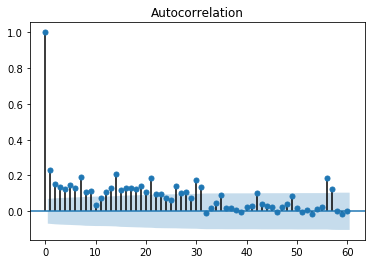

In [17]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot as plt
plot_acf(segment1_training_set,lags = 60)
plt.show()

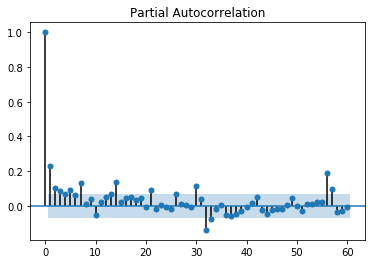

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(segment1_training_set, lags=60)
plt.show()

### It is observed from the above pacf plot at lag 8 correlation is almost 0, so we can take this is a lag

In [0]:
lag = 8

In [0]:
# creating a data structure with 8 timesteps and 1 output
X_train_segment1 = []
y_train_segment1 = []
for i in range(lag,len(segment1_training_set_scaled)):
    X_train_segment1.append(segment1_training_set_scaled[i-lag:i,0])
    y_train_segment1.append(segment1_training_set_scaled[i,0])
X_train_segment1,y_train_segment1 = np.array(X_train_segment1),np.array(y_train_segment1)

In [21]:
# lets look how the X_train_segment1 is
X_train_segment1

array([[0.01361725, 0.00187351, 0.0010053 , ..., 0.06703528, 0.06118625,
        0.0607293 ],
       [0.00187351, 0.0010053 , 0.0698684 , ..., 0.06118625, 0.0607293 ,
        0.04478158],
       [0.0010053 , 0.0698684 , 0.06123195, ..., 0.0607293 , 0.04478158,
        0.01864376],
       ...,
       [0.14407787, 0.15728386, 0.1598885 , ..., 0.0891062 , 0.16674283,
        0.1467282 ],
       [0.15728386, 0.1598885 , 0.16075672, ..., 0.16674283, 0.1467282 ,
        0.17469384],
       [0.1598885 , 0.16075672, 0.13219704, ..., 0.1467282 , 0.17469384,
        0.19370316]])

In [22]:
# lets look how y_train_segment1 is
y_train_segment1

array([4.47815756e-02, 1.86437580e-02, 6.91829647e-02, 6.58471943e-02,
       6.41107659e-02, 6.16432097e-02, 6.34710291e-02, 4.83915189e-02,
       1.73185889e-02, 7.42551636e-02, 6.62127582e-02, 7.05995248e-02,
       7.80935844e-02, 8.80095047e-02, 6.18716871e-02, 2.95695485e-01,
       6.72180589e-02, 9.00201060e-03, 3.42716140e-03, 7.49405959e-03,
       1.12228112e-01, 1.94205812e-02, 1.37086456e-04, 2.28477426e-03,
       7.22445622e-02, 6.49789801e-02, 7.00054835e-02, 5.13617255e-02,
       1.53993785e-02, 7.91445805e-02, 6.84975324e-02, 7.45293365e-02,
       6.98683970e-02, 7.19703893e-02, 5.57027966e-02, 2.08828368e-02,
       7.97386218e-02, 7.37525133e-02, 7.41180771e-02, 6.98227015e-02,
       7.24730397e-02, 5.83074392e-02, 2.38987388e-02, 8.83750685e-02,
       7.90988850e-02, 3.07941875e-01, 9.13909706e-05, 2.92908061e-02,
       2.26649607e-02, 1.85980625e-02, 7.74538476e-02, 8.77353317e-03,
       7.92816670e-02, 6.59842808e-02, 9.41326997e-02, 7.07366112e-02,
      

In [23]:
# lets check shape of X_train_segment1
X_train_segment1.shape

(798, 8)

In [24]:
# Reshaping the data for LSTM
X_train_segment1 = np.reshape(X_train_segment1,(X_train_segment1.shape[0],X_train_segment1.shape[1],1))
print('Reshaped X_train_segment1', X_train_segment1.shape)
print(X_train_segment1)

Reshaped X_train_segment1 (798, 8, 1)
[[[0.01361725]
  [0.00187351]
  [0.0010053 ]
  ...
  [0.06703528]
  [0.06118625]
  [0.0607293 ]]

 [[0.00187351]
  [0.0010053 ]
  [0.0698684 ]
  ...
  [0.06118625]
  [0.0607293 ]
  [0.04478158]]

 [[0.0010053 ]
  [0.0698684 ]
  [0.06123195]
  ...
  [0.0607293 ]
  [0.04478158]
  [0.01864376]]

 ...

 [[0.14407787]
  [0.15728386]
  [0.1598885 ]
  ...
  [0.0891062 ]
  [0.16674283]
  [0.1467282 ]]

 [[0.15728386]
  [0.1598885 ]
  [0.16075672]
  ...
  [0.16674283]
  [0.1467282 ]
  [0.17469384]]

 [[0.1598885 ]
  [0.16075672]
  [0.13219704]
  ...
  [0.1467282 ]
  [0.17469384]
  [0.19370316]]]


## UNTIL HERE

In [25]:
# Importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional

# Initialising the RNN
segment_1_model = Sequential()

# Adding the first Bidirectional LSTM layer and some Dropout regularisation
segment_1_model.add(Bidirectional(LSTM(2750, activation='relu',dropout = 0.2), input_shape=(X_train_segment1.shape[1],1)))
segment_1_model.add(Dropout(0.2))

# Adding the output layer
segment_1_model.add(Dense(units = 1))

# compiling the RNN
segment_1_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
segment_1_model.fit(X_train_segment1,y_train_segment1, epochs = 100, batch_size = 32)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





798/798 [==============================] - 17s 22ms/step - loss: 0.0109
Epoch 2/100
798/798 [==============================] - 3s 4ms/step - loss: 0.0086
Epoch 3/100
798/798 [==============================] - 3s 4ms/step - loss: 0.0084
Epoch 4/100
798/798 [==============================] - 3s 4ms/step - loss: 0.0085
Epoch 5/100
798/798 [==============================] - 3s 4ms/step - loss: 0.0086
Epoch 6/100
798/798 [==============================] - 3s 4ms/step - loss: 0.0086
Epoch 7/100
798/798 [==============================] - 3s 4ms/step - loss: 0.0080
Epoch 8/100
798/798 [==============================] - 3s 4ms/step - loss: 0.0081
Epoch 9/100
798/798 [==============================] - 3s 4ms/step - loss: 0.0078
Epoch 10/100
798/798 [================

In [26]:
# lets load the test dataset
dataset_test = pd.read_csv('/content/drive/My Drive/L&T/test_1eLl9Yf.csv')
dataset_test.head(3)

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1


In [27]:
# lets check length of test dataset
len(dataset_test)

180

In [28]:
segment1_train.head()

,application_date,case_count
0,2017-04-01,299.0
1,2017-04-03,42.0
2,2017-04-04,23.0
3,2017-04-05,1530.0
4,2017-04-07,1341.0


In [29]:
# Extracting the case_count feature
dataset_total = segment1_train.copy()
dataset_total = dataset_total.case_count
print('dataset_total shape:',dataset_total.shape)
dataset_total.head()

dataset_total shape: (806,)


0     299.0
1      42.0
2      23.0
3    1530.0
4    1341.0
Name: case_count, dtype: float64

In [30]:
# lets check the length of dataset_total
len(dataset_total)

806

In [51]:
# we are going to predict 87 days for segment1
# to predict 87 days we are taking 8 timesteps as input
inputs = dataset_total[len(dataset_total) - 87 - 8:]
inputs.head()

711    3164.0
712    3880.0
713    3742.0
714    4424.0
715    4187.0
Name: case_count, dtype: float64

In [52]:
inputs = inputs.values
inputs

array([3164., 3880., 3742., 4424., 4187., 2030., 4308., 3150., 3672.,
       3087., 3887., 3102., 1925., 3477., 2856., 3251., 2602., 3271.,
       2125., 1406., 3629., 2445., 3171., 2951., 2910., 2160., 1350.,
       3274., 2425., 2317., 3383., 3025., 2432., 1538., 3967., 3845.,
       2826., 3131., 3085., 2453., 1117., 3720., 3257., 3416., 3312.,
       3239., 2543., 1361., 3927., 3175., 3510., 2808., 3273., 2527.,
       1634., 3880., 3245., 3519., 3696., 3717., 2684., 1948., 4520.,
       4757., 3380., 3768., 3847., 2724., 1700., 4174., 3586., 3786.,
       3623., 3498., 2776., 1760., 4279., 3301., 3810., 3538., 3432.,
       2512., 1633., 3804., 3154., 3443., 3500., 3519., 2894., 1951.,
       3650., 3212., 3824., 4240.,   13.])

In [53]:
# lets check shape of inputs
inputs.shape

(95,)

In [54]:
# lets reshape the inputs in to rows X column
inputs = inputs.reshape(-1,1)
inputs

array([[3164.],
       [3880.],
       [3742.],
       [4424.],
       [4187.],
       [2030.],
       [4308.],
       [3150.],
       [3672.],
       [3087.],
       [3887.],
       [3102.],
       [1925.],
       [3477.],
       [2856.],
       [3251.],
       [2602.],
       [3271.],
       [2125.],
       [1406.],
       [3629.],
       [2445.],
       [3171.],
       [2951.],
       [2910.],
       [2160.],
       [1350.],
       [3274.],
       [2425.],
       [2317.],
       [3383.],
       [3025.],
       [2432.],
       [1538.],
       [3967.],
       [3845.],
       [2826.],
       [3131.],
       [3085.],
       [2453.],
       [1117.],
       [3720.],
       [3257.],
       [3416.],
       [3312.],
       [3239.],
       [2543.],
       [1361.],
       [3927.],
       [3175.],
       [3510.],
       [2808.],
       [3273.],
       [2527.],
       [1634.],
       [3880.],
       [3245.],
       [3519.],
       [3696.],
       [3717.],
       [2684.],
       [1948.],
       [

In [55]:
# now lets check the shape of inputs
inputs.shape

(95, 1)

In [0]:
# transforming inputs into scale (0,1)
inputs = sc.transform(inputs)

In [57]:
# lets check length of inputs
len(inputs)

95

In [58]:
# prepare the data for test_segment1
X_test_segment1 = []
for i in range(8,len(inputs)):
    X_test_segment1.append(inputs[i-8:i,0])

X_test_segment1 = np.array(X_test_segment1)
X_test_segment1

array([[0.14453482, 0.17725279, 0.17094681, 0.20211113, 0.1912813 ,
        0.09271614, 0.19681046, 0.14389508],
       [0.17725279, 0.17094681, 0.20211113, 0.1912813 , 0.09271614,
        0.19681046, 0.14389508, 0.16774813],
       [0.17094681, 0.20211113, 0.1912813 , 0.09271614, 0.19681046,
        0.14389508, 0.16774813, 0.14101627],
       [0.20211113, 0.1912813 , 0.09271614, 0.19681046, 0.14389508,
        0.16774813, 0.14101627, 0.17757266],
       [0.1912813 , 0.09271614, 0.19681046, 0.14389508, 0.16774813,
        0.14101627, 0.17757266, 0.1417017 ],
       [0.09271614, 0.19681046, 0.14389508, 0.16774813, 0.14101627,
        0.17757266, 0.1417017 , 0.08791811],
       [0.19681046, 0.14389508, 0.16774813, 0.14101627, 0.17757266,
        0.1417017 , 0.08791811, 0.15883751],
       [0.14389508, 0.16774813, 0.14101627, 0.17757266, 0.1417017 ,
        0.08791811, 0.15883751, 0.13046061],
       [0.16774813, 0.14101627, 0.17757266, 0.1417017 , 0.08791811,
        0.15883751, 0.130460

In [59]:
# lets check the shape of X_test_segment1
X_test_segment1.shape

(87, 8)

In [60]:
# Reshaping the data for LSTM model
X_test_segment1 = np.reshape(X_test_segment1,(X_test_segment1.shape[0],X_test_segment1.shape[1],1))
print('X_test_segment1 Shape:', X_test_segment1.shape)

X_test_segment1 Shape: (87, 8, 1)


In [0]:
# lets predict for segment 1 for 87 days with 60 timesteps
predicted_segment1 = segment_1_model.predict(X_test_segment1)

In [62]:
# lets inverse transform the predictions (i.e bringing into normal form)
predicted_segment1 = sc.inverse_transform(predicted_segment1)
predicted_segment1

array([[3421.4148],
       [3542.9224],
       [3537.5137],
       [3487.3367],
       [2309.939 ],
       [3432.1917],
       [3313.0774],
       [3327.8176],
       [3281.5452],
       [3322.126 ],
       [2828.1191],
       [2090.2844],
       [3238.548 ],
       [3057.48  ],
       [2972.2305],
       [2863.1177],
       [2658.462 ],
       [1986.8234],
       [1913.5322],
       [3229.1816],
       [2681.6367],
       [3028.159 ],
       [2984.4172],
       [2637.5542],
       [2018.3705],
       [1971.1294],
       [3112.1604],
       [2633.5269],
       [2787.0771],
       [3027.1296],
       [2659.0417],
       [1992.305 ],
       [1934.741 ],
       [3378.7385],
       [3155.1272],
       [3072.183 ],
       [3135.804 ],
       [2698.877 ],
       [2003.322 ],
       [1895.4573],
       [3369.3203],
       [3209.124 ],
       [3200.5415],
       [3278.6528],
       [2759.625 ],
       [2068.5273],
       [1924.7524],
       [3363.64  ],
       [3231.6433],
       [3182.9048],


In [0]:
# creating data for id column
segment1_id = []
for d in range(1,88):
    segment1_id.append(d)

In [64]:
# lets put the predictions i.e case_count into a dataframe
segment1 = pd.DataFrame(predicted_segment1)
segment1 = segment1.rename(columns = {0:'case_count'})
segment1['id'] = segment1_id
segment1['segment'] = 1
segment1['case_count'] = segment1['case_count'].round(0).astype(int)
segment1.head()

,case_count,id,segment
0,3421,1,1
1,3543,2,1
2,3538,3,1
3,3487,4,1
4,2310,5,1


In [65]:
# lets check the shape of predictions
segment1.shape

(87, 3)

In [66]:
segment1_train.head(2)

,application_date,case_count
0,2017-04-01,299.0
1,2017-04-03,42.0


In [0]:
real_case_count = segment1_train.iloc[:,1:2].values

In [68]:
inputs_X_test_segment1_prediction = dataset_total
inputs_X_test_segment1_prediction.head(3)

0    299.0
1     42.0
2     23.0
Name: case_count, dtype: float64

In [0]:
inputs_X_test_segment1_prediction = inputs_X_test_segment1_prediction.values
#inputs_X_test_segment1_prediction

In [70]:
inputs_X_test_segment1_prediction.shape

(806,)

In [0]:
inputs_X_test_segment1_prediction = inputs_X_test_segment1_prediction.reshape(-1,1)

In [72]:
inputs_X_test_segment1_prediction.shape

(806, 1)

In [0]:
inputs_X_test_segment1_prediction = sc.transform(inputs_X_test_segment1_prediction)

In [74]:
len(inputs_X_test_segment1_prediction)

806

In [0]:
# prepare the data for test_segment1
X_test_segment1_prediction = []
for i in range(8,806):
    X_test_segment1_prediction.append(inputs_X_test_segment1_prediction[i-8:i,0])

X_test_segment1_prediction = np.array(X_test_segment1_prediction)
#X_test_segment1_prediction

In [76]:
X_test_segment1_prediction.shape

(798, 8)

In [77]:
X_test_segment1_prediction = np.reshape(X_test_segment1_prediction,(X_test_segment1_prediction.shape[0],X_test_segment1_prediction.shape[1],1))
print('X_test_segment1_prediction Shape:', X_test_segment1_prediction.shape)

X_test_segment1_prediction Shape: (798, 8, 1)


In [0]:
predicted_real_case_count = segment_1_model.predict(X_test_segment1_prediction)
#predicted_real_case_count

In [79]:
predicted_real_case_count = sc.inverse_transform(predicted_real_case_count)
predicted_real_case_count

array([[ 2227.7747  ],
       [ 2153.2017  ],
       [ 2332.0845  ],
       [ 2049.9287  ],
       [ 2076.0479  ],
       [ 2052.2317  ],
       [ 2062.6753  ],
       [ 1974.8135  ],
       [ 2032.0758  ],
       [ 2264.3667  ],
       [ 2034.4077  ],
       [ 2038.7323  ],
       [ 2026.5265  ],
       [ 2011.2899  ],
       [ 1881.9929  ],
       [ 1893.6356  ],
       [ 2026.9889  ],
       [ 1298.4481  ],
       [ 1305.6013  ],
       [ 1240.8346  ],
       [ 1114.3918  ],
       [ 1422.7888  ],
       [ 1978.6396  ],
       [ 2080.3208  ],
       [ 2378.0852  ],
       [ 2418.4304  ],
       [ 2294.0735  ],
       [ 2296.6206  ],
       [ 2098.1392  ],
       [ 2306.7256  ],
       [ 2175.1375  ],
       [ 2240.2678  ],
       [ 1969.0422  ],
       [ 1975.7052  ],
       [ 1834.8737  ],
       [ 1896.1085  ],
       [ 2237.9238  ],
       [ 1946.474   ],
       [ 1957.6536  ],
       [ 1941.0038  ],
       [ 1939.4827  ],
       [ 1809.3641  ],
       [ 1872.1107  ],
       [ 22

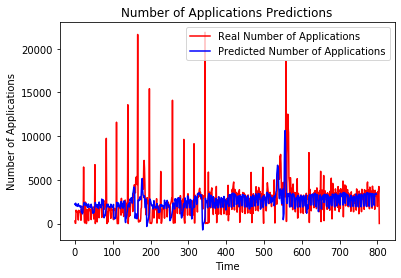

In [80]:
# Visualising the results
import matplotlib.pyplot as plt
plt.plot(real_case_count, color = 'red', label = 'Real Number of Applications')
plt.plot(predicted_real_case_count, color = 'blue', label = 'Predicted Number of Applications')
plt.title('Number of Applications Predictions')
plt.xlabel('Time')
plt.ylabel('Number of Applications')
plt.legend()
plt.show()

## Segment 2 

In [81]:
df_case_count.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [82]:
df_case_count.shape

(80402, 6)

In [83]:
# filtering segment 2
segment2 = df_case_count[df_case_count['segment'] == 2]
print('segment2 shape:',segment2.shape)
segment2.head()

segment2 shape: (13504, 6)


,application_date,segment,branch_id,state,zone,case_count
66898,2017-04-01,2,NaN,ASSAM,NaN,0.0
66899,2017-04-02,2,NaN,ASSAM,NaN,0.0
66900,2017-04-03,2,NaN,ASSAM,NaN,0.0
66901,2017-04-04,2,NaN,ASSAM,NaN,0.0
66902,2017-04-05,2,NaN,ASSAM,NaN,0.0


In [84]:
# lets check null values
segment2.isnull().sum()

application_date        0
segment                 0
branch_id           13504
state                   0
zone                13504
case_count              0
dtype: int64

In [85]:
# checking the case_count for segment 2 (i.e number of applications) on 2017-04-01
segment2[segment2['application_date'] == '2017-04-01']

,application_date,segment,branch_id,state,zone,case_count
66898,2017-04-01,2,NaN,ASSAM,NaN,0.0
67742,2017-04-01,2,NaN,BIHAR,NaN,0.0
68586,2017-04-01,2,NaN,CHHATTISGARH,NaN,34.0
69430,2017-04-01,2,NaN,GUJARAT,NaN,0.0
70274,2017-04-01,2,NaN,HARYANA,NaN,0.0
71118,2017-04-01,2,NaN,JHARKHAND,NaN,0.0
71962,2017-04-01,2,NaN,KERALA,NaN,23.0
72806,2017-04-01,2,NaN,KARNATAKA,NaN,165.0
73650,2017-04-01,2,NaN,MAHARASHTRA,NaN,0.0
74494,2017-04-01,2,NaN,MADHYA PRADESH,NaN,36.0


In [86]:
# converting application_date column to date time format
segment2['application_date'] = pd.to_datetime(segment2['application_date'])
print('segment2 shape:',segment2.shape)
segment2.head()

segment2 shape: (13504, 6)


,application_date,segment,branch_id,state,zone,case_count
66898,2017-04-01,2,NaN,ASSAM,NaN,0.0
66899,2017-04-02,2,NaN,ASSAM,NaN,0.0
66900,2017-04-03,2,NaN,ASSAM,NaN,0.0
66901,2017-04-04,2,NaN,ASSAM,NaN,0.0
66902,2017-04-05,2,NaN,ASSAM,NaN,0.0


In [87]:
#groupby application_date and sum the case_count
# grouping is doing to check / predict number of case_count on each day
segment2 = segment2.groupby('application_date').case_count.sum().reset_index()
print('segment2 shape:', segment2.shape)
segment2.head()

segment2 shape: (844, 2)


,application_date,case_count
0,2017-04-01,897.0
1,2017-04-02,605.0
2,2017-04-03,2016.0
3,2017-04-04,2245.0
4,2017-04-05,2415.0


In [88]:
# plot daily case_count
plot_data = [
    go.Scatter(
        x = segment2['application_date'],
        y = segment2['case_count']
    )
]

plot_layout = go.Layout(title = 'Daily Case_count')
fig = go.Figure(data = plot_data, layout = plot_layout)
pyoff.iplot(fig)

# Checking Stationarity for segment2

H0 : Time Series is Non - Stationary

H1 : Time Sereies is Statinary

Note : if ADF Statistic < Critical Value (Reject the Null Hypothesis)

Note : if ADF Statistic > Critical Value (Failed to Reject the Null Hypothesis)

In [89]:

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

stationarity_segment2 = segment2["case_count"].values
result = adfuller(stationarity_segment2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.359219
p-value: 0.000350
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
Reject Ho - Time Series is Stationary


In [90]:
segment2_train = segment2.copy()
segment2_train.head()

,application_date,case_count
0,2017-04-01,897.0
1,2017-04-02,605.0
2,2017-04-03,2016.0
3,2017-04-04,2245.0
4,2017-04-05,2415.0


In [91]:
# extracting case_count column for time series prediction
segment2_training_set = segment2_train.iloc[:,1:2].values
segment2_training_set

array([[  897.],
       [  605.],
       [ 2016.],
       [ 2245.],
       [ 2415.],
       [ 2379.],
       [ 2249.],
       [ 2297.],
       [ 1435.],
       [ 3166.],
       [ 5649.],
       [ 8781.],
       [10351.],
       [ 8289.],
       [ 8799.],
       [ 6745.],
       [ 9597.],
       [11351.],
       [12310.],
       [12384.],
       [10857.],
       [ 8881.],
       [ 6172.],
       [ 5931.],
       [ 4422.],
       [ 2384.],
       [ 1102.],
       [  810.],
       [  854.],
       [  881.],
       [ 1354.],
       [ 1929.],
       [ 1925.],
       [ 2993.],
       [ 2724.],
       [ 2441.],
       [ 1652.],
       [ 2118.],
       [ 2964.],
       [ 3030.],
       [ 6776.],
       [ 8364.],
       [ 6431.],
       [ 5005.],
       [ 8251.],
       [ 8312.],
       [ 9642.],
       [13979.],
       [10976.],
       [10215.],
       [ 7058.],
       [ 8148.],
       [ 8625.],
       [ 7599.],
       [ 6402.],
       [ 4841.],
       [ 3915.],
       [ 1193.],
       [  747.

In [92]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
segment2_training_set_scaled = sc.fit_transform(segment2_training_set)
segment2_training_set_scaled

array([[0.01601985],
       [0.00925024],
       [0.04196226],
       [0.04727129],
       [0.0512125 ],
       [0.05037789],
       [0.04736403],
       [0.04847684],
       [0.0284926 ],
       [0.06862336],
       [0.12618816],
       [0.19879909],
       [0.23519729],
       [0.18739278],
       [0.1992164 ],
       [0.15159735],
       [0.21771688],
       [0.25838086],
       [0.2806139 ],
       [0.28232948],
       [0.24692818],
       [0.20111745],
       [0.13831316],
       [0.13272592],
       [0.09774192],
       [0.05049381],
       [0.02077248],
       [0.01400287],
       [0.01502295],
       [0.01564891],
       [0.02661474],
       [0.03994529],
       [0.03985255],
       [0.0646126 ],
       [0.05837622],
       [0.05181527],
       [0.03352344],
       [0.04432698],
       [0.06394028],
       [0.06547039],
       [0.15231604],
       [0.18913154],
       [0.14431771],
       [0.11125794],
       [0.1865118 ],
       [0.187926  ],
       [0.21876014],
       [0.319

In [93]:
# lets check the length of segment2_training_set_scaled
len(segment2_training_set_scaled)

844

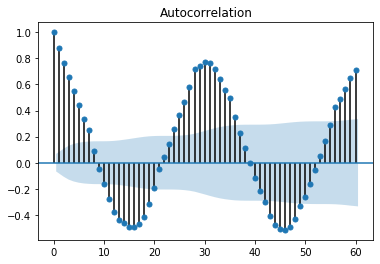

In [95]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot as plt
plot_acf(segment2_training_set,lags = 60)
plt.show()

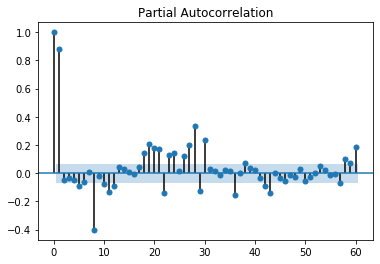

In [96]:
#PACF
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(segment2_training_set, lags=60)
plt.show()

###Its observed from PACF graph that at lag 7 correlation is near to Zero, and considered lag 7 as time steps. 

In [0]:
# creating a data structure with 7 timesteps and 1 output
X_train_segment2 = []
y_train_segment2 = []
for i in range(7,len(segment2_training_set_scaled)):
    X_train_segment2.append(segment2_training_set_scaled[i-7:i,0])
    y_train_segment2.append(segment2_training_set_scaled[i,0])
X_train_segment2,y_train_segment2 = np.array(X_train_segment2),np.array(y_train_segment2)

In [98]:
# lets look how the X_train_segment2 is
X_train_segment2

array([[0.01601985, 0.00925024, 0.04196226, ..., 0.0512125 , 0.05037789,
        0.04736403],
       [0.00925024, 0.04196226, 0.04727129, ..., 0.05037789, 0.04736403,
        0.04847684],
       [0.04196226, 0.04727129, 0.0512125 , ..., 0.04736403, 0.04847684,
        0.0284926 ],
       ...,
       [0.28156443, 0.6158251 , 0.72033663, ..., 0.74977976, 0.68558446,
        0.60084852],
       [0.6158251 , 0.72033663, 0.72791765, ..., 0.68558446, 0.60084852,
        0.27961701],
       [0.72033663, 0.72791765, 0.74977976, ..., 0.60084852, 0.27961701,
        0.62795011]])

In [99]:
# # lets look how the y_train_segment2 is
y_train_segment2

array([0.04847684, 0.0284926 , 0.06862336, 0.12618816, 0.19879909,
       0.23519729, 0.18739278, 0.1992164 , 0.15159735, 0.21771688,
       0.25838086, 0.2806139 , 0.28232948, 0.24692818, 0.20111745,
       0.13831316, 0.13272592, 0.09774192, 0.05049381, 0.02077248,
       0.01400287, 0.01502295, 0.01564891, 0.02661474, 0.03994529,
       0.03985255, 0.0646126 , 0.05837622, 0.05181527, 0.03352344,
       0.04432698, 0.06394028, 0.06547039, 0.15231604, 0.18913154,
       0.14431771, 0.11125794, 0.1865118 , 0.187926  , 0.21876014,
       0.31930728, 0.24968702, 0.23204433, 0.1588538 , 0.18412389,
       0.19518245, 0.17139611, 0.14364538, 0.10745584, 0.08598785,
       0.02288218, 0.01254231, 0.02758845, 0.04254185, 0.09363843,
       0.08624287, 0.097626  , 0.03695461, 0.06312885, 0.09393982,
       0.09273427, 0.10063987, 0.11007558, 0.12975843, 0.14211527,
       0.27305606, 0.3807901 , 0.37506375, 0.38746696, 0.37524922,
       0.34174897, 0.24349701, 0.32201975, 0.3749942 , 0.36975

In [100]:
# lets check the shape of X_train_segment2
X_train_segment2.shape

(837, 7)

In [101]:
# Reshaping the data for LSTM
X_train_segment2 = np.reshape(X_train_segment2,(X_train_segment2.shape[0],X_train_segment2.shape[1],1))
print('Reshaped X_train_segment2', X_train_segment2.shape)
print(X_train_segment2)

Reshaped X_train_segment2 (837, 7, 1)
[[[0.01601985]
  [0.00925024]
  [0.04196226]
  ...
  [0.0512125 ]
  [0.05037789]
  [0.04736403]]

 [[0.00925024]
  [0.04196226]
  [0.04727129]
  ...
  [0.05037789]
  [0.04736403]
  [0.04847684]]

 [[0.04196226]
  [0.04727129]
  [0.0512125 ]
  ...
  [0.04736403]
  [0.04847684]
  [0.0284926 ]]

 ...

 [[0.28156443]
  [0.6158251 ]
  [0.72033663]
  ...
  [0.74977976]
  [0.68558446]
  [0.60084852]]

 [[0.6158251 ]
  [0.72033663]
  [0.72791765]
  ...
  [0.68558446]
  [0.60084852]
  [0.27961701]]

 [[0.72033663]
  [0.72791765]
  [0.74977976]
  ...
  [0.60084852]
  [0.27961701]
  [0.62795011]]]


In [102]:
# define the model for segment_2

# Initialising the RNN
segment_2_model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
segment_2_model.add(Bidirectional(LSTM(500, activation='relu',dropout = 0.2), input_shape=(X_train_segment2.shape[1],1)))
segment_2_model.add(Dropout(0.2))


# Adding the output layer
segment_2_model.add(Dense(units = 1))

# compiling the RNN
segment_2_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
segment_2_model.fit(X_train_segment2,y_train_segment2, epochs = 100, batch_size = 16)

Epoch 1/100
837/837 [==============================] - 3s 3ms/step - loss: 0.0425
Epoch 2/100
837/837 [==============================] - 1s 2ms/step - loss: 0.0262
Epoch 3/100
837/837 [==============================] - 1s 2ms/step - loss: 0.0210
Epoch 4/100
837/837 [==============================] - 1s 2ms/step - loss: 0.0195
Epoch 5/100
837/837 [==============================] - 1s 2ms/step - loss: 0.0202
Epoch 6/100
837/837 [==============================] - 1s 2ms/step - loss: 0.0216
Epoch 7/100
837/837 [==============================] - 1s 2ms/step - loss: 0.0188
Epoch 8/100
837/837 [==============================] - 1s 2ms/step - loss: 0.0189
Epoch 9/100
837/837 [==============================] - 1s 2ms/step - loss: 0.0179
Epoch 10/100
837/837 [==============================] - 1s 2ms/step - loss: 0.0176
Epoch 11/100
837/837 [==============================] - 1s 2ms/step - loss: 0.0161
Epoch 12/100
837/837 [==============================] - 1s 2ms/step - loss: 0.0178
Epoch 13/100


In [0]:
segment_2_model

In [103]:
# lets load the test dataset
dataset_test = pd.read_csv('/content/drive/My Drive/L&T/test_1eLl9Yf.csv')
dataset_test.head(3)

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1


In [104]:
# lets check the length of dataset_test
len(dataset_test)

180

In [105]:
segment2_train.head()

,application_date,case_count
0,2017-04-01,897.0
1,2017-04-02,605.0
2,2017-04-03,2016.0
3,2017-04-04,2245.0
4,2017-04-05,2415.0


In [106]:
# Extracting the case_count feature
dataset_total2 = segment2_train.copy()
dataset_total2 = dataset_total2.case_count
print('dataset_total2 shape:',dataset_total2.shape)
dataset_total2.head()

dataset_total2 shape: (844,)


0     897.0
1     605.0
2    2016.0
3    2245.0
4    2415.0
Name: case_count, dtype: float64

In [107]:
# lets check the length of dataset_total
len(dataset_total2)

844

In [108]:
# we are going to predict 93 days for segment2
# to predict 93 days we are taking 7 timesteps as input
inputs2 = dataset_total2[len(dataset_total2) - 93 - 7:]
inputs2.head()

744    22101.0
745    25680.0
746    27849.0
747    18712.0
748    25054.0
Name: case_count, dtype: float64

In [0]:
inputs2 = inputs2.values
#inputs2

In [110]:
# lets check the shape of inputs2
inputs2.shape

(100,)

In [111]:
# lets reshape the inputs2 into rows X columns
inputs2 = inputs2.reshape(-1,1)
inputs2

array([[22101.],
       [25680.],
       [27849.],
       [18712.],
       [25054.],
       [24209.],
       [17086.],
       [29305.],
       [23980.],
       [27052.],
       [26691.],
       [24811.],
       [22324.],
       [14656.],
       [ 7582.],
       [ 1235.],
       [ 3992.],
       [ 4997.],
       [ 4042.],
       [ 4043.],
       [ 2681.],
       [ 2790.],
       [ 2880.],
       [ 3727.],
       [ 4492.],
       [ 4919.],
       [16913.],
       [11892.],
       [26389.],
       [30635.],
       [30377.],
       [29675.],
       [29109.],
       [28690.],
       [13988.],
       [27489.],
       [29749.],
       [29467.],
       [26609.],
       [26262.],
       [21915.],
       [14304.],
       [21465.],
       [21506.],
       [16301.],
       [ 8619.],
       [ 1445.],
       [ 6302.],
       [ 3736.],
       [ 3878.],
       [ 3888.],
       [ 2663.],
       [ 2758.],
       [ 4055.],
       [ 4308.],
       [ 3834.],
       [ 5509.],
       [18954.],
       [25680.

In [112]:
# lets check the shape of inputs2
inputs2.shape

(100, 1)

In [0]:
# transforming inputs into scale (0,1)
inputs2 = sc.transform(inputs2)

In [114]:
# lets check length of inputs
len(inputs2)

100

In [120]:
# prepare the data for test_segment2
X_test_segment2 = []
for i in range(7,len(inputs2)):
    X_test_segment2.append(inputs2[i-7:i,0])

X_test_segment2 = np.array(X_test_segment2)
X_test_segment2

array([[0.50760421, 0.5905782 , 0.64086336, 0.4290351 , 0.57606528,
        0.55647517, 0.39133862],
       [0.5905782 , 0.64086336, 0.4290351 , 0.57606528, 0.55647517,
        0.39133862, 0.67461863],
       [0.64086336, 0.4290351 , 0.57606528, 0.55647517, 0.39133862,
        0.67461863, 0.55116613],
       [0.4290351 , 0.57606528, 0.55647517, 0.39133862, 0.67461863,
        0.55116613, 0.62238605],
       [0.57606528, 0.55647517, 0.39133862, 0.67461863, 0.55116613,
        0.62238605, 0.61401678],
       [0.55647517, 0.39133862, 0.67461863, 0.55116613, 0.62238605,
        0.61401678, 0.57043168],
       [0.39133862, 0.67461863, 0.55116613, 0.62238605, 0.61401678,
        0.57043168, 0.51277415],
       [0.67461863, 0.55116613, 0.62238605, 0.61401678, 0.57043168,
        0.51277415, 0.33500255],
       [0.55116613, 0.62238605, 0.61401678, 0.57043168, 0.51277415,
        0.33500255, 0.17100199],
       [0.62238605, 0.61401678, 0.57043168, 0.51277415, 0.33500255,
        0.17100199, 0.0

In [121]:
# lets check the shape of X_test_segment2
X_test_segment2.shape

(93, 7)

In [122]:
# Reshaping the data for LSTM model
X_test_segment2 = np.reshape(X_test_segment2,(X_test_segment2.shape[0],X_test_segment2.shape[1],1))
print('X_test_segment2 Shape:', X_test_segment2.shape)

X_test_segment2 Shape: (93, 7, 1)


In [0]:
# lets predict for segment 1 for 93 days with 60 timesteps
predicted_segment2 = segment_2_model.predict(X_test_segment2)

In [124]:
# lets inverse transform the predictions (i.e bringing into normal form)
predicted_segment2 = sc.inverse_transform(predicted_segment2)
predicted_segment2

array([[12842.413 ],
       [26627.514 ],
       [19883.725 ],
       [19674.023 ],
       [18296.273 ],
       [16462.023 ],
       [13091.323 ],
       [ 8712.453 ],
       [ 4699.9756],
       [ 3211.6812],
       [ 3994.7705],
       [ 4370.187 ],
       [ 4085.816 ],
       [ 3683.2168],
       [ 2770.2764],
       [ 2785.4412],
       [ 3874.9126],
       [ 4889.57  ],
       [ 4456.569 ],
       [ 4332.973 ],
       [15861.903 ],
       [13389.088 ],
       [25047.691 ],
       [24794.457 ],
       [22694.375 ],
       [21015.387 ],
       [19861.139 ],
       [18100.744 ],
       [14308.267 ],
       [25086.568 ],
       [23086.215 ],
       [21078.953 ],
       [18326.402 ],
       [17166.2   ],
       [13411.563 ],
       [ 8398.645 ],
       [17856.883 ],
       [14931.374 ],
       [10908.389 ],
       [ 4793.8286],
       [ 3806.4734],
       [ 3757.4219],
       [ 3373.5674],
       [ 3721.8176],
       [ 3614.1978],
       [ 2746.6565],
       [ 2770.4275],
       [ 4553

In [0]:
# creating data for id column
segment2_id = []
for d in range(88,181):
    segment2_id.append(d)

In [126]:
len(segment2_id)

93

In [127]:
# lets put the predictions i.e case_count into a dataframe
segment2 = pd.DataFrame(predicted_segment2)
segment2 = segment2.rename(columns = {0:'case_count'})
segment2['id'] = segment2_id
segment2['segment'] = 2
segment2['case_count'] = segment2['case_count'].round(0).astype(int)
segment2.head()

,case_count,id,segment
0,12842,88,2
1,26628,89,2
2,19884,90,2
3,19674,91,2
4,18296,92,2


In [128]:
# lets check the shape of predictions
segment2.shape

(93, 3)

In [129]:
segment2_train.head(2)

,application_date,case_count
0,2017-04-01,897.0
1,2017-04-02,605.0


In [0]:
real_case_count_segment2 = segment2_train.iloc[:,1:2].values

In [131]:
inputs_X_test_segment2_prediction = dataset_total2
inputs_X_test_segment2_prediction.head(3)

0     897.0
1     605.0
2    2016.0
Name: case_count, dtype: float64

In [0]:
inputs_X_test_segment2_prediction = inputs_X_test_segment2_prediction.values
#inputs_X_test_segment1_prediction

In [133]:
inputs_X_test_segment2_prediction.shape

(844,)

In [0]:
inputs_X_test_segment2_prediction = inputs_X_test_segment2_prediction.reshape(-1,1)

In [135]:
inputs_X_test_segment2_prediction.shape

(844, 1)

In [0]:
inputs_X_test_segment2_prediction = sc.transform(inputs_X_test_segment2_prediction)

In [138]:
len(inputs_X_test_segment2_prediction)

844

In [0]:
# prepare the data for test_segment1
X_test_segment2_prediction = []
for i in range(7,len(inputs_X_test_segment2_prediction)):
    X_test_segment2_prediction.append(inputs_X_test_segment2_prediction[i-7:i,0])

X_test_segment2_prediction = np.array(X_test_segment2_prediction)
#X_test_segment1_prediction

In [140]:
X_test_segment2_prediction.shape

(837, 7)

In [141]:
X_test_segment2_prediction = np.reshape(X_test_segment2_prediction,(X_test_segment2_prediction.shape[0],X_test_segment2_prediction.shape[1],1))
print('X_test_segment2_prediction Shape:', X_test_segment2_prediction.shape)

X_test_segment2_prediction Shape: (837, 7, 1)


In [0]:
predicted_real_case_count_segment2 = segment_2_model.predict(X_test_segment2_prediction)
#predicted_real_case_count

In [143]:
predicted_real_case_count_segment2 = sc.inverse_transform(predicted_real_case_count_segment2)
predicted_real_case_count_segment2

array([[ 3936.7812],
       [ 3633.7354],
       [ 3246.521 ],
       [ 3602.3108],
       [ 5163.981 ],
       [ 7512.94  ],
       [ 8303.29  ],
       [ 6861.575 ],
       [ 6423.1333],
       [ 6806.934 ],
       [ 9654.514 ],
       [11599.716 ],
       [11790.478 ],
       [11909.07  ],
       [10437.95  ],
       [ 8564.826 ],
       [ 6330.9424],
       [ 4917.544 ],
       [ 3571.7375],
       [ 2263.2498],
       [ 2084.6304],
       [ 2595.835 ],
       [ 3435.7478],
       [ 3788.992 ],
       [ 4191.719 ],
       [ 5033.98  ],
       [ 5044.652 ],
       [ 4809.0537],
       [ 4232.3237],
       [ 3671.9846],
       [ 3284.1365],
       [ 3281.8809],
       [ 3422.1663],
       [ 3383.8948],
       [ 6234.6763],
       [ 6877.333 ],
       [ 5329.9355],
       [ 3984.8806],
       [ 7642.483 ],
       [ 8209.706 ],
       [10397.848 ],
       [14392.606 ],
       [12020.193 ],
       [ 9863.6875],
       [ 7580.0684],
       [ 7043.81  ],
       [ 7404.2017],
       [ 5748

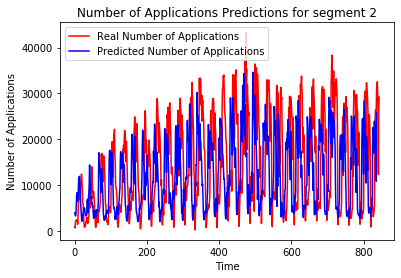

In [144]:
# Visualising the results
import matplotlib.pyplot as plt
plt.plot(real_case_count_segment2, color = 'red', label = 'Real Number of Applications')
plt.plot(predicted_real_case_count_segment2, color = 'blue', label = 'Predicted Number of Applications')
plt.title('Number of Applications Predictions for segment 2')
plt.xlabel('Time')
plt.ylabel('Number of Applications')
plt.legend()
plt.show()

In [145]:
output = pd.concat([segment1,segment2],axis = 0)
output

,case_count,id,segment
0,3421,1,1
1,3543,2,1
2,3538,3,1
3,3487,4,1
4,2310,5,1
...,...,...,...
88,23438,176,2
89,20773,177,2
90,16253,178,2
91,10833,179,2


In [0]:
sample = pd.read_csv('/content/drive/My Drive/L&T/sample_submission_IIzFVsf.csv')

In [0]:
count = pd.DataFrame(output[['id','case_count']])

In [0]:
sample1 = sample.drop('case_count',axis = 1)

In [150]:
sample2 = sample1.merge(count, on = 'id')
sample2.head()

,id,application_date,segment,case_count
0,1,2019-07-06,1,3421
1,2,2019-07-07,1,3543
2,3,2019-07-08,1,3538
3,4,2019-07-09,1,3487
4,5,2019-07-10,1,2310


In [0]:
sample2.to_csv(' Bidirectional LSTM_V18_With_Approach.csv',index = False)